<a href="https://colab.research.google.com/github/Developer-Arindam/Cancer-type-prediction-/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
df = pd.read_excel("/content/cancer.xlsx")
df1 = df.copy()

In [95]:
df1.head(50)

,index,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,N Stage,6th Stage,differentiate,diagnosis
0,1,842302,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,...,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,N1,IIA,Poorly differentiated,M
1,2,842517,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,...,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,N2,IIIA,Moderately differentiated,M
2,3,84300903,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,N3,IIIC,Moderately differentiated,M
3,4,84348301,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,...,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,N1,IIA,Poorly differentiated,M
4,5,84358402,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,...,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,N1,IIB,Poorly differentiated,M
5,6,843786,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,...,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,N1,IIA,Moderately differentiated,M
6,7,844359,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,NaN,...,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,N1,IIA,Well differentiated,M
7,8,84458202,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,...,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,N1,IIB,Moderately differentiated,M
8,9,844981,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,...,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,N3,IIIC,Poorly differentiated,M
9,10,84501001,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,...,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,N3,IIIC,Well differentiated,M


In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    569 non-null    int64  
 1   id                       569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           552 non-null    float64
 9   concave_points_mean      550 non-null    float64
 10  symmetry_mean            568 non-null    float64
 11  fractal_dimension        569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [97]:
df1.describe()

,index,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,texture_worst.1,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,552.000000,550.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,568.000000,562.000000,563.000000,569.000000,569.000000
mean,285.000000,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.090908,0.050092,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254652,0.275565,0.115828,0.290076,0.083946
std,164.400426,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079521,0.038653,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157204,0.207699,0.065001,0.061867,0.018061
min,1.000000,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000692,0.001852,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,143.000000,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.030880,0.020885,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147575,0.118975,0.065280,0.250400,0.071460
50%,285.000000,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.064905,0.034605,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.213000,0.229850,0.101200,0.282200,0.080040
75%,427.000000,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.132325,0.075022,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339300,0.385300,0.162500,0.317900,0.092080
max,569.000000,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [98]:
for column in df1.columns:
  if(df1[column].dtype != object):
    if(df1[column].isnull().sum() != 0):
      df1[column].fillna(df1[column].mean(),inplace = True)

<ipython-input-98-e22d15ce266c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[column].fillna(df1[column].mean(),inplace = True)


<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


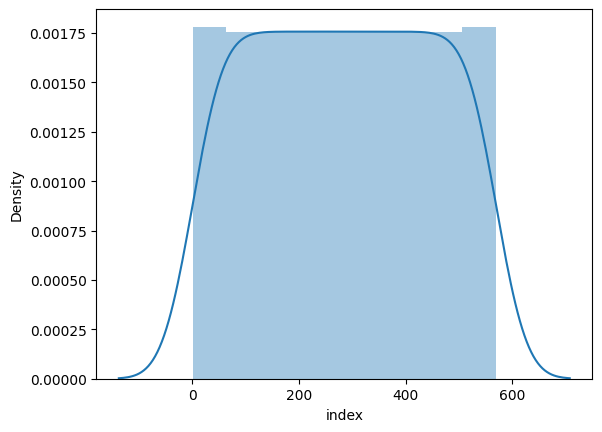

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


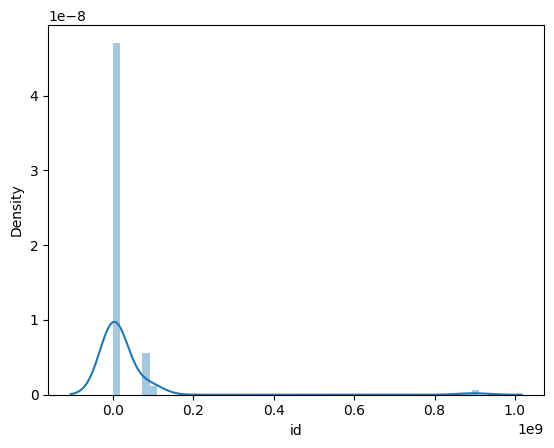

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


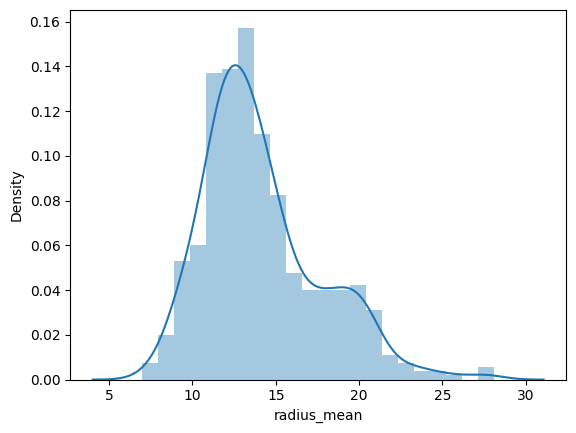

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


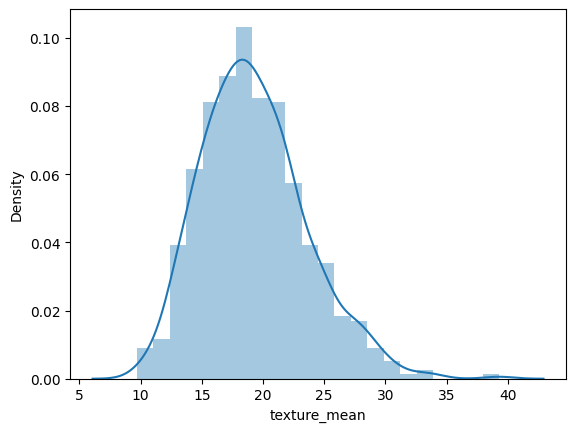

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


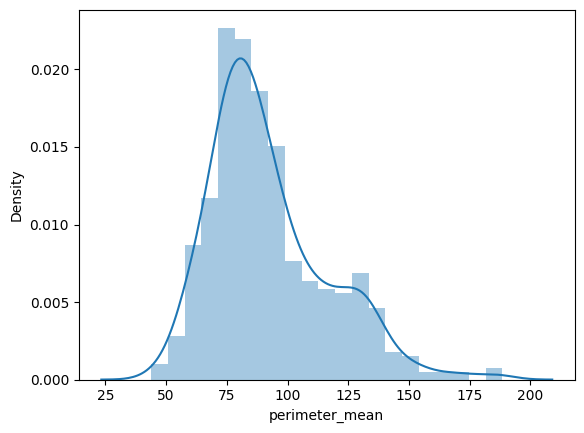

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


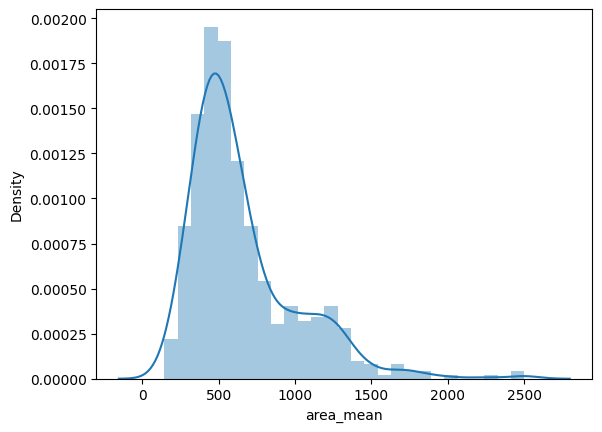

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


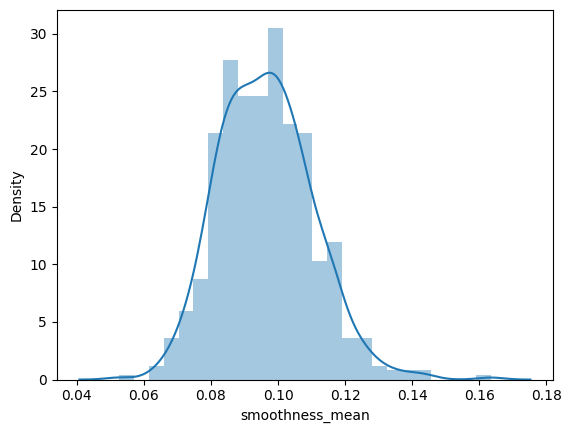

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


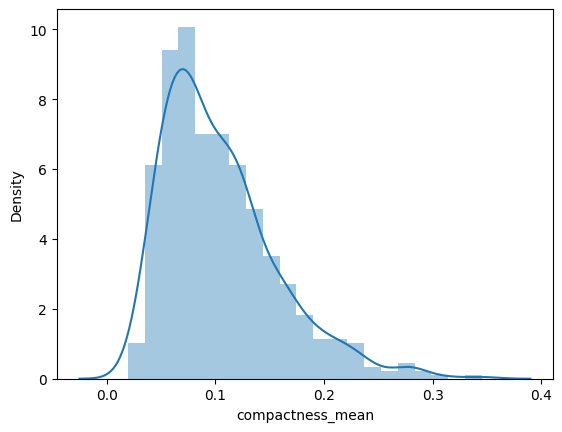

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


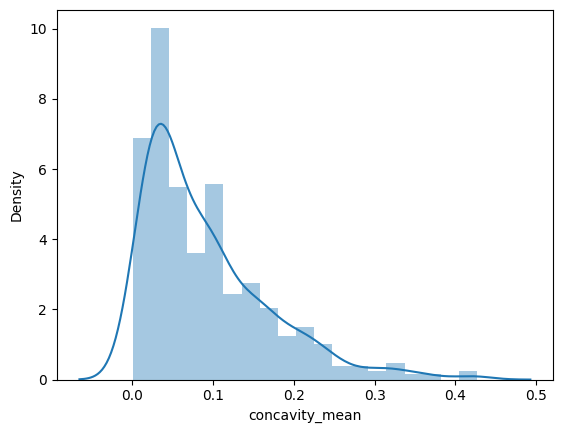

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


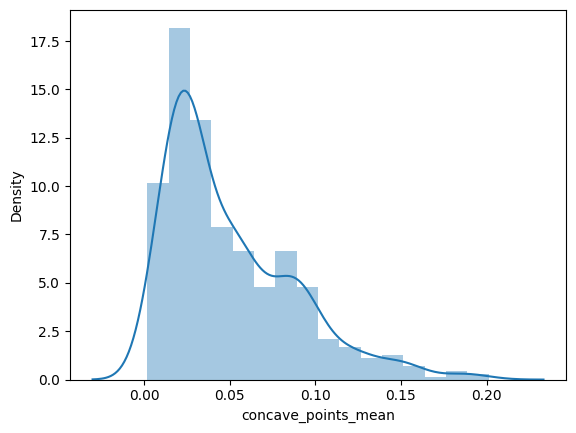

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


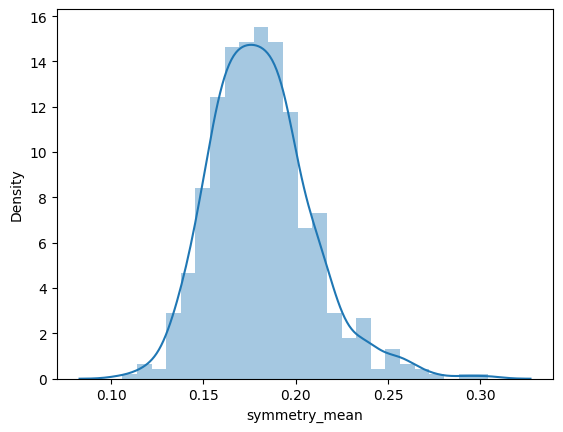

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


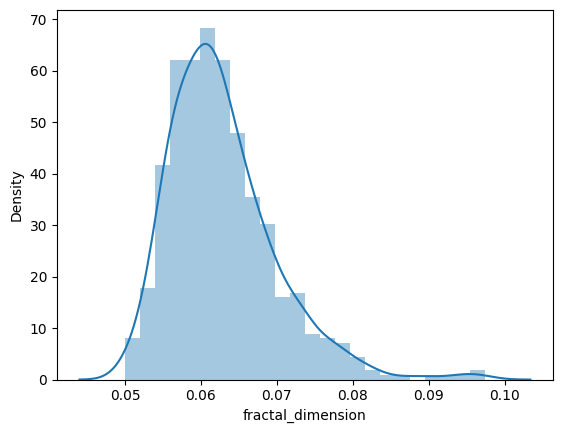

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


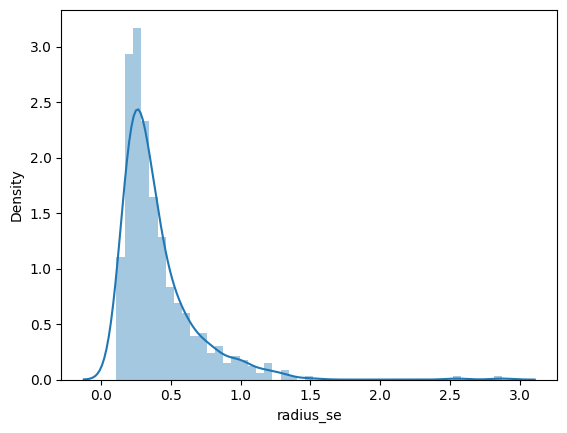

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


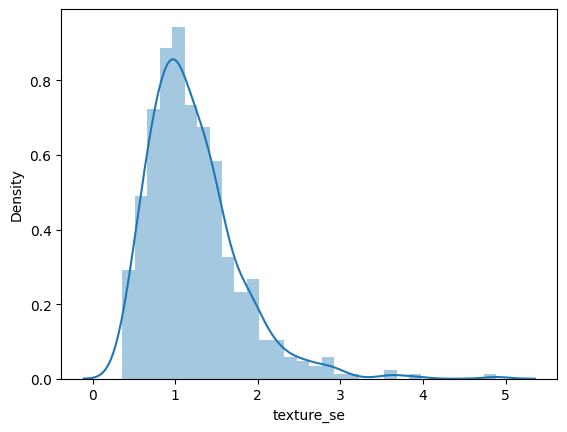

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


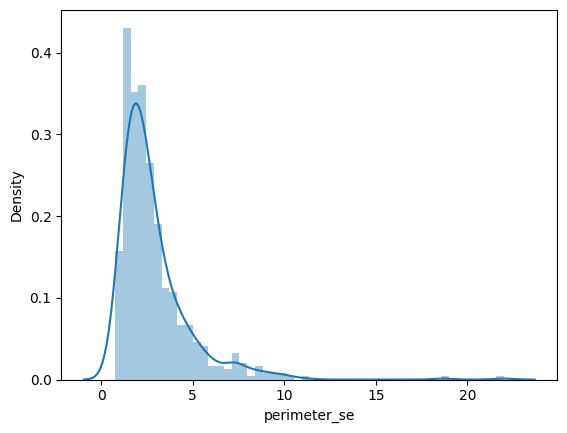

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


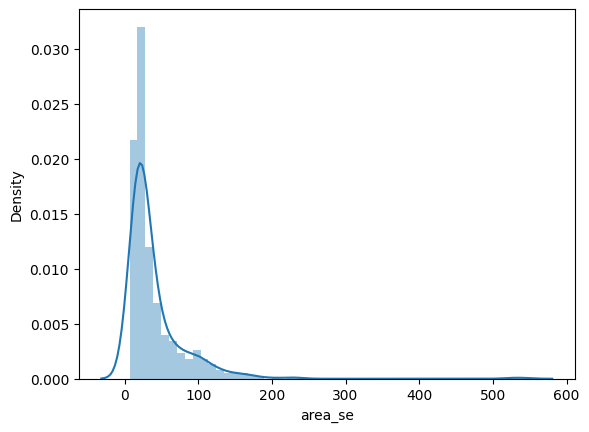

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


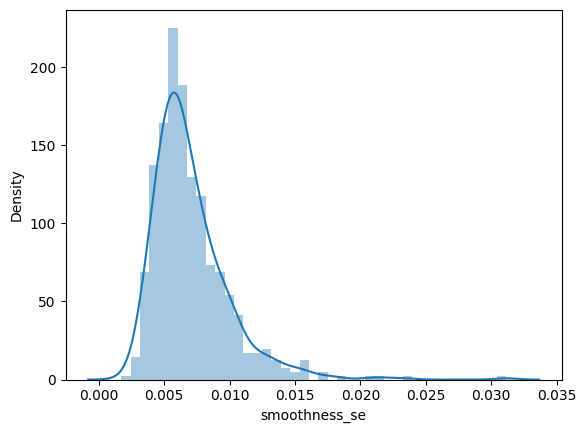

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


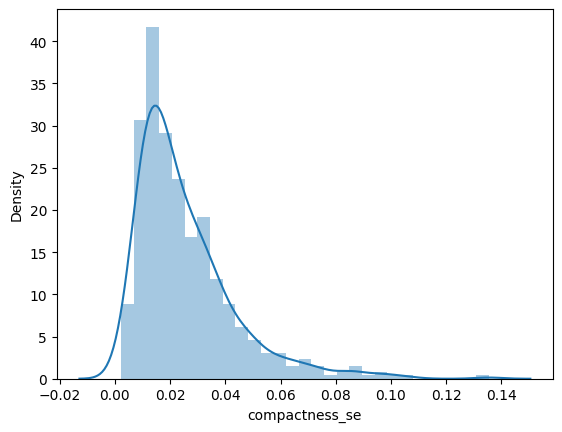

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


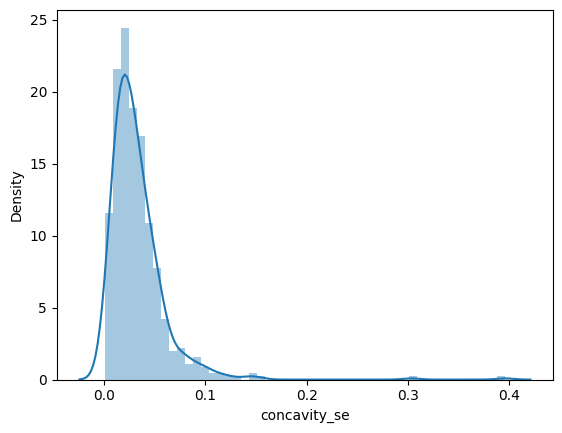

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


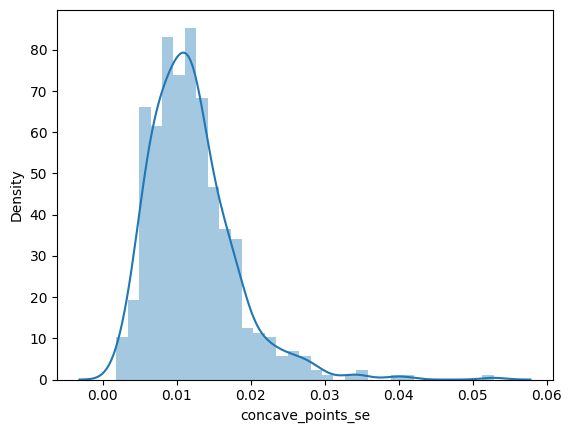

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


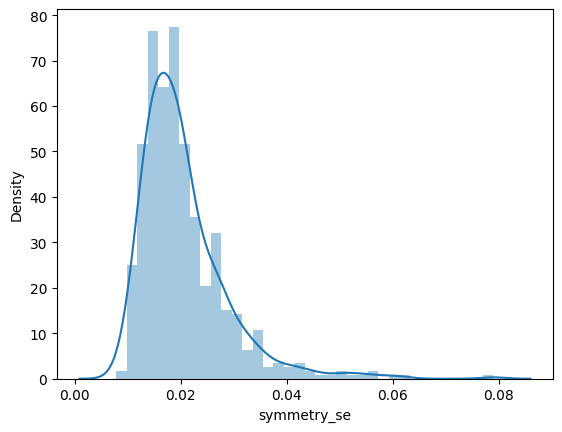

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


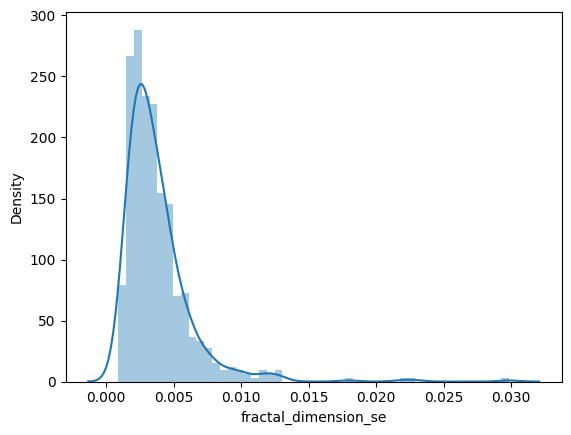

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


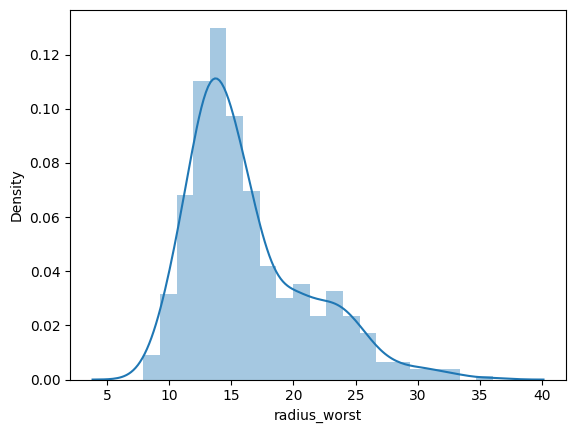

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


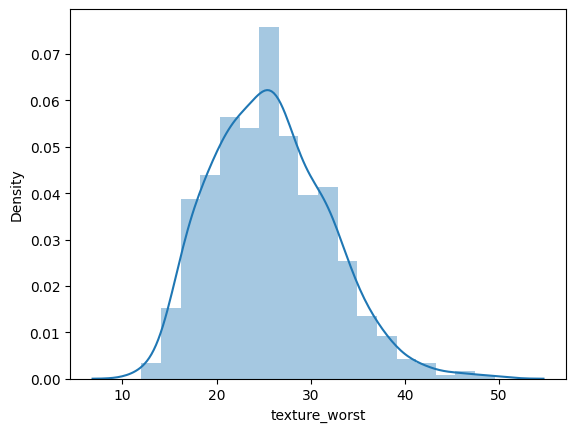

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


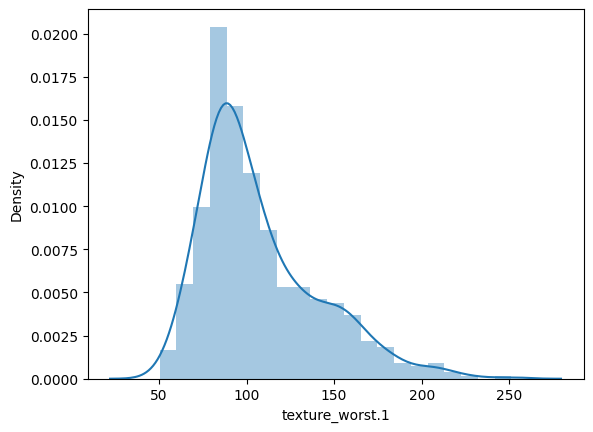

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


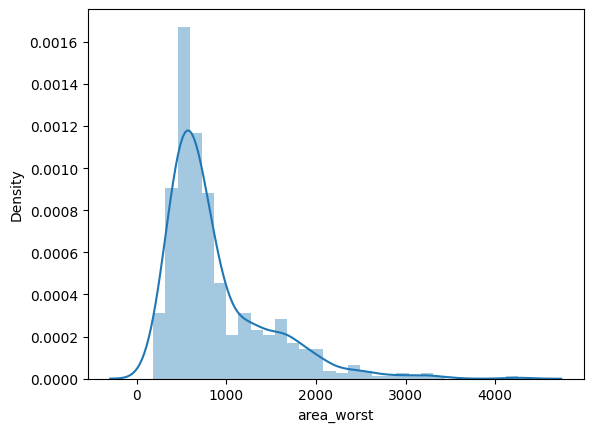

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


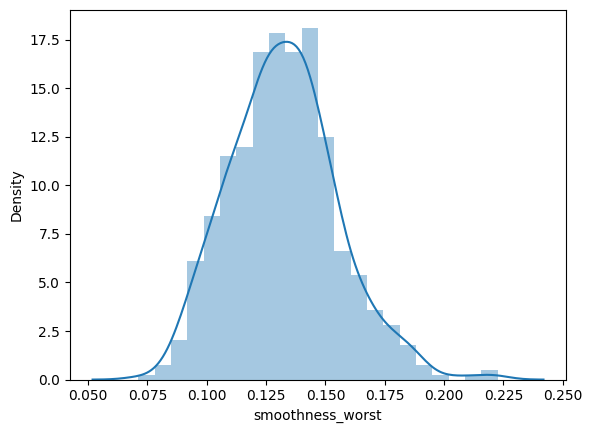

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


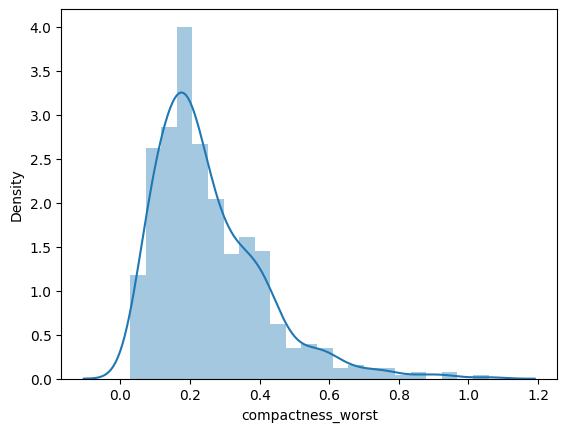

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


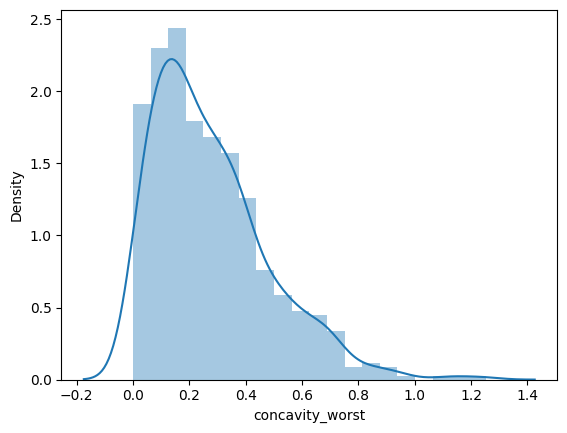

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


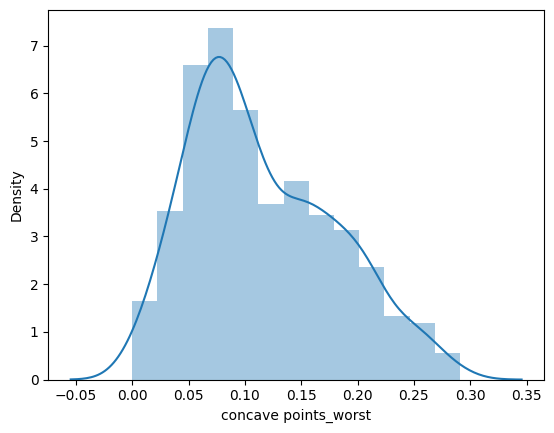

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


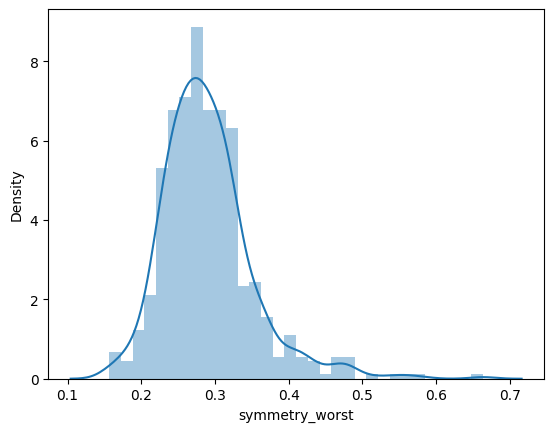

<ipython-input-99-47c5a98005b1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[attr])


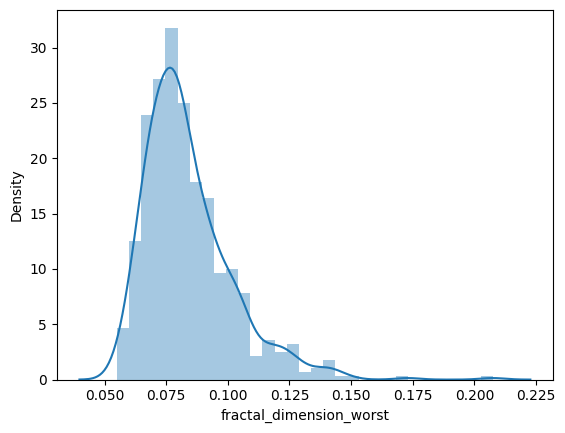

In [99]:
for attr in df1.columns:
  if(df1[attr].dtype != object):
    sns.distplot(df1[attr])
    plt.show()

In [100]:
df1.isnull().sum()

,0
index,0
id,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave_points_mean,0


In [101]:
df1 = df1.drop(columns = ['id','index'])

In [102]:
df1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,N Stage,6th Stage,differentiate,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,N1,IIA,Poorly differentiated,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,N2,IIIA,Moderately differentiated,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,N3,IIIC,Moderately differentiated,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,N1,IIA,Poorly differentiated,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,N1,IIB,Poorly differentiated,M


In [103]:
df1.diagnosis = [1 if value == 'M' else 0 for value in df1.diagnosis]

In [104]:
df1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,N Stage,6th Stage,differentiate,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,N1,IIA,Poorly differentiated,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,N2,IIIA,Moderately differentiated,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,N3,IIIC,Moderately differentiated,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,N1,IIA,Poorly differentiated,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,N1,IIB,Poorly differentiated,1


<Axes: xlabel='diagnosis'>

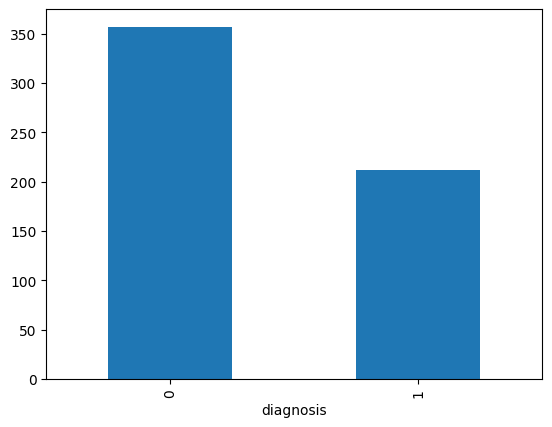

In [105]:
df1['diagnosis'].value_counts().plot(kind = "bar")

In [106]:
for column in df1.columns:
  if(df1[column].dtype == object):
    print(column, "  "  ,df1[column].nunique() )

N Stage    3
6th Stage    5
differentiate    4


In [107]:
I = df1["N Stage"].value_counts().sort_values(ascending = False).head(10).index

for i in I:
  df1[i] = np.where(df1["N Stage"] == i,1,0)

In [108]:
df1["6th Stage"].value_counts().sort_values(ascending = False).head(10).index
I = df1["6th Stage"].value_counts().sort_values(ascending = False).head(10).index

for i in I:
  df1[i] = np.where(df1["6th Stage"] == i,1,0)

In [109]:
I = df1["differentiate"].value_counts().sort_values(ascending = False).head(10).index

for i in I:
  df1[i] = np.where(df1["differentiate"] == i,1,0)

In [110]:
df1 = df1.drop(columns = ["N Stage","6th Stage","differentiate"])

In [111]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   radius_mean                569 non-null    float64
 1   texture_mean               569 non-null    float64
 2   perimeter_mean             569 non-null    float64
 3   area_mean                  569 non-null    float64
 4   smoothness_mean            569 non-null    float64
 5   compactness_mean           569 non-null    float64
 6   concavity_mean             569 non-null    float64
 7   concave_points_mean        569 non-null    float64
 8   symmetry_mean              569 non-null    float64
 9   fractal_dimension          569 non-null    float64
 10  radius_se                  569 non-null    float64
 11  texture_se                 569 non-null    float64
 12  perimeter_se               569 non-null    float64
 13  area_se                    569 non-null    float64

In [112]:
# devide into target variables and predictors
Y = df1["diagnosis"]
X = df1.drop(["diagnosis"],axis = 1)

In [136]:
from sklearn.preprocessing import StandardScaler

#create scalar object
scaler = StandardScaler()

# fit the scalar to the data and transform the data
X_scaled = scaler.fit_transform(X)
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [114]:
X_scaled

array([[ 1.0970639815, -2.0733350147,  1.2699336881, ...,  1.5988276955,
        -0.4103386692, -0.0419590679],
       [ 1.8298206075, -0.3536324082,  1.6859547106, ..., -0.6254582672,
        -0.4103386692, -0.0419590679],
       [ 1.5798881149,  0.4561869518,  1.5665031299, ..., -0.6254582672,
        -0.4103386692, -0.0419590679],
       ...,
       [ 0.7022842488,  2.0455737991,  0.6726757847, ..., -0.6254582672,
         2.4370113644, -0.0419590679],
       [ 1.8383410334,  2.3364571899,  1.9825241523, ..., -0.6254582672,
         2.4370113644, -0.0419590679],
       [-1.8084012452,  1.2217920364, -1.8143885057, ..., -0.6254582672,
         2.4370113644, -0.0419590679]])

In [115]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test , Y_train , Y_test = train_test_split(X_scaled, Y, test_size = 0.20 ,random_state = 20)

In [116]:
# tran the model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

# train the model on the training data
lr_model.fit(X_train,Y_train)

#predict the target variable on the test data
Y_prediction = lr_model.predict(X_test)

In [117]:
Y_prediction

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0])

In [118]:
Y_test

,diagnosis
269,0
263,1
30,1
452,0
214,1
...,...
17,1
504,0
346,0
14,1


In [119]:
# evalustion of the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, Y_prediction)
print("Accuracy(in %): ",accuracy*100)

Accuracy(in %):  98.24561403508771


In [120]:
import pickle

# Save the model
with open("cancer_prediction_model.pkl", "wb") as file:
    pickle.dump(lr_model, file)


In [121]:
# Load the model
with open("cancer_prediction_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, predictions))


Accuracy: 0.9824561403508771


In [138]:
#applying the model on entire dataset
for i in range(200):
    # Extract the input row as a DataFrame
    input_df = df1.drop(["diagnosis"], axis=1).iloc[[i]]  # Keep it as a DataFrame

    # Scale the data
    scaled_input = scaler.transform(input_df)

    # Make a prediction
    prediction = loaded_model.predict(scaled_input)
    print("Prediction:", prediction[0])

Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 0
Prediction: 1
Prediction: 1
Prediction: 0
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 1
Prediction: 0
Prediction: 1
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 1
Prediction: 1
Prediction: 0
Prediction: 1
Prediction: 1
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 1
Prediction: 0
Prediction: 1
Prediction: 1
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 1
Predic